In [148]:
import numpy as np
import pandas as pd

# set pandas to view all columns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Load Data

In [149]:
df = pd.read_csv('./dataset/cleaned_data.csv')
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,mths_earliest_cr_line
0,5000.0,36,10.65,10+ years,RENT,24000.0,Verified,credit_card,AZ,27.65,0,1,3,0,13648,83.7,9,f,0,0,0.0,79239.0,1142337.6,0,-401
1,2500.0,60,15.27,< 1 year,RENT,30000.0,Source Verified,car,GA,1.00,0,5,3,0,1687,9.4,4,f,0,0,0.0,79239.0,15857.8,1,-227
2,2400.0,36,15.96,10+ years,RENT,12252.0,Not Verified,small_business,IL,8.72,0,2,2,0,2956,98.5,10,f,0,0,0.0,79239.0,291166.0,0,-196
3,10000.0,36,13.49,10+ years,RENT,49200.0,Source Verified,other,CA,20.00,0,1,10,0,5598,21.0,37,f,0,0,0.0,79239.0,117558.0,0,-266
4,5000.0,36,7.90,3 years,RENT,36000.0,Source Verified,wedding,AZ,11.20,0,3,9,0,7963,28.3,12,f,0,0,0.0,79239.0,225352.9,0,-159


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238913 entries, 0 to 238912
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   238913 non-null  float64
 1   term                        238913 non-null  int64  
 2   int_rate                    238913 non-null  float64
 3   emp_length                  238913 non-null  object 
 4   home_ownership              238913 non-null  object 
 5   annual_inc                  238913 non-null  float64
 6   verification_status         238913 non-null  object 
 7   purpose                     238913 non-null  object 
 8   addr_state                  238913 non-null  object 
 9   dti                         238913 non-null  float64
 10  delinq_2yrs                 238913 non-null  int64  
 11  inq_last_6mths              238913 non-null  int64  
 12  open_acc                    238913 non-null  int64  
 13  pub_rec       

# Data Preprocessings 

## Creating Dataset for Model
### For Weight Based Models

In [151]:
cat_cols = df.select_dtypes(['O']).columns.to_list()

ohe_cols = pd.get_dummies(df[cat_cols])
ohe_cols.head()

,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,addr_state_XX,initial_list_status_f,initial_list_status_w
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [152]:
df_wb = pd.concat([df.select_dtypes(exclude='O').copy(), ohe_cols], axis=1)
columns_arr = [col for col in df_wb.columns if col != 'target']+['target']
df_wb = df_wb[columns_arr]

df_wb.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_earliest_cr_line,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MT,addr_state_NC,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,addr_state_XX,initial_list_status_f,initial_list_status_w,target
0,5000.0,36,10.65,24000.0,27.65,0,1,3,0,13648,83.7,9,0,0,0.0,79239.0,1142337.6,-401,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
1,2500.0,60,15.27,30000.0,1.00,0,5,3,0,1687,9.4,4,0,0,0.0,79239.0,15857.8,-227,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1
2,2400.0,36,15.96,12252.0,8.72,0,2,2,0,2956,98.5,10,0,0,0.0,79239.0,291166.0,-196,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
3,10000.0,36,13.49,49200.0,20.00,0,1,10,0,5598,21.0,37,0,0,0.0,79239.0,117558.0,-266,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,0
4,5000.0,36,7.90,36000.0,11.20,0,3,9,0,7963,28.3,12,0,0,0.0,79239.0,225352.9,-159,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

### For Informations Models

In [153]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [154]:
df_if = df[cat_cols].copy()
df_if = encoder.fit_transform(df_if)
df_if = pd.DataFrame(data = df_if, columns = encoder.feature_names_in_)
df_if.head()

,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status
0,1.0,3.0,2.0,1.0,3.0,0.0
1,10.0,3.0,1.0,0.0,10.0,0.0
2,1.0,3.0,0.0,8.0,12.0,0.0
3,1.0,3.0,1.0,7.0,4.0,0.0
4,3.0,3.0,1.0,9.0,3.0,0.0


In [155]:
df_if = pd.concat([df.select_dtypes(exclude='O').copy(), df_if], axis=1)
columns_arr = [col for col in df_if.columns if col != 'target']+['target']
df_if = df_if[columns_arr]

df_if.head()

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_earliest_cr_line,emp_length,home_ownership,verification_status,purpose,addr_state,initial_list_status,target
0,5000.0,36,10.65,24000.0,27.65,0,1,3,0,13648,83.7,9,0,0,0.0,79239.0,1142337.6,-401,1.0,3.0,2.0,1.0,3.0,0.0,0
1,2500.0,60,15.27,30000.0,1.00,0,5,3,0,1687,9.4,4,0,0,0.0,79239.0,15857.8,-227,10.0,3.0,1.0,0.0,10.0,0.0,1
2,2400.0,36,15.96,12252.0,8.72,0,2,2,0,2956,98.5,10,0,0,0.0,79239.0,291166.0,-196,1.0,3.0,0.0,8.0,12.0,0.0,0
3,10000.0,36,13.49,49200.0,20.00,0,1,10,0,5598,21.0,37,0,0,0.0,79239.0,117558.0,-266,1.0,3.0,1.0,7.0,4.0,0.0,0
4,5000.0,36,7.90,36000.0,11.20,0,3,9,0,7963,28.3,12,0,0,0.0,79239.0,225352.9,-159,3.0,3.0,1.0,9.0,3.0,0.0,0


# Splitting Dataset

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
train_cal_wb, test_wb, train_cal_if, test_if = train_test_split(df_wb, df_if,
                                                                test_size = .2, stratify = df_wb['target'])

In [158]:
train_wb, cal_wb, train_if, cal_if = train_test_split(train_cal_wb, train_cal_if,
                                                      test_size = .1, stratify = train_cal_wb['target'])

In [159]:
# check dataset
train_wb.shape, test_wb.shape, cal_wb.shape

((172017, 94), (47783, 94), (19113, 94))

In [160]:
# check dataset
train_if.shape, test_if.shape, cal_if.shape

((172017, 25), (47783, 25), (19113, 25))

# Create X and y

In [161]:
X_train_wb, y_train_wb = train_wb.iloc[:,:-1], train_wb.iloc[:,-1]
X_test_wb, y_test_wb = test_wb.iloc[:,:-1], test_wb.iloc[:,-1]
X_cal_wb, y_cal_wb = cal_wb.iloc[:,:-1], cal_wb.iloc[:,-1]

In [162]:
X_train_if, y_train_if = train_if.iloc[:,:-1], train_if.iloc[:,-1]
X_test_if, y_test_if = test_if.iloc[:,:-1], test_if.iloc[:,-1]
X_cal_if, y_cal_if = cal_if.iloc[:,:-1], cal_if.iloc[:,-1]

# Modellings

In [163]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

SKF = StratifiedKFold(5, 
                     shuffle = True,
                     random_state=0)

## Model Scorings

Financial losses in credit loans have a significant impact on the financial health of the creditor. Misclassifying a bad loan as a good loan poses greater losses compared to misclassifying a good loan as a bad loan, as losing money from a fraudulent or defaulted loan is more detrimental than losing potential profit from rejecting a good loan.

By using Recall to prioritize the reduction of False Negatives (minimizing the misclassification of bad loans as good loans), the model can significantly lower the likelihood of approving bad loans. However, this may come at the expense of Precision, increasing the probability of misclassifying good loans as bad loans (an increase in False Positives). Therefore, incorporating and displaying additional metrics, such as ROC-AUC and F1-score, can provide a more balanced evaluation and prevent the model from being overly optimistic or biased toward a single metric.

In [164]:
scorings = ['balanced_accuracy','precision','recall','f1','roc_auc','average_precision']

In [165]:
def evaluate_cross_validation(cv_result):
    new_key = []
    for k in cv_result.keys():
        new_key.append(k.replace("test", "validation"))

    res = pd.DataFrame(cv_result)
    res.columns = new_key
    res = res.describe().T[['mean', 'std']]
    res.iloc[2:,] = 100*res.iloc[2:,]
    return res

def compile_all_cv_results(*cv_results, model_names):
    # make dataset of all cross validation
    df = pd.DataFrame({})
    for cv_result, model_name in zip(cv_results, model_names):
        df_new = pd.DataFrame(cv_result)
        df_new['model_name'] = model_name
        df = pd.concat([df, df_new], axis=0)

    return df

def compare_all_cv_results(*cv_results, model_names):
    df = compile_all_cv_results(*cv_results, 
                                model_names = model_names)
    mean_df = df.groupby(by='model_name').mean().T
    mean_df.columns = ['mean_'+c for c in model_names]
    
    std_df = df.groupby(by='model_name').std().T
    std_df.columns = ['std_'+c for c in model_names]
    
    df = pd.concat([mean_df, std_df], axis=1)
    df.iloc[2:,:] = df.iloc[2:,:]*100
    return df

## Fitting and Evaluation

### Logistic Regression

In [166]:
# logistic regression pipeline
logit_model = LogisticRegression()
logit_pipe = Pipeline([
    ('transformer', PowerTransformer()),
    ('model', logit_model)
])

# validate model performances
logit_cross_val_score = cross_validate(logit_pipe,
                                       X = X_train_wb,
                                       y = y_train_wb,
                                       cv = SKF,
                                       scoring = scorings,
                                       n_jobs=-1)

In [167]:
# validation results
evaluate_cross_validation(logit_cross_val_score)

,mean,std
fit_time,38.562477,0.586053
score_time,0.521711,0.104158
validation_balanced_accuracy,53.250654,0.165444
validation_precision,54.917998,1.047698
validation_recall,8.436701,0.365762
validation_f1,14.624544,0.566782
validation_roc_auc,70.587959,0.119264
validation_average_precision,39.522422,0.222618


### Decision Tree

In [168]:
# decision tree pipeline
dc_model = DecisionTreeClassifier(random_state=0)
dc_pipe = Pipeline([
    ('model', dc_model)
])

# validate model performances
dc_cross_val_score = cross_validate(dc_pipe,
                                    X = X_train_if,
                                    y = y_train_if,
                                    cv = SKF,
                                    scoring = scorings,
                                    n_jobs=-1)

In [169]:
# validation results
evaluate_cross_validation(dc_cross_val_score)

,mean,std
fit_time,5.280952,0.168744
score_time,0.111861,0.010723
validation_balanced_accuracy,54.963185,0.230816
validation_precision,29.095646,0.361807
validation_recall,31.127920,0.334626
validation_f1,30.077154,0.331642
validation_roc_auc,54.963185,0.230816
validation_average_precision,24.101505,0.133094


### Random Forest

In [170]:
# random forest pipeline
rf_model = RandomForestClassifier(random_state=0)
rf_pipe = Pipeline([
    ('model', rf_model)
])

# validate model performances
rf_cross_val_score = cross_validate(rf_pipe,
                                    X = X_train_if,
                                    y = y_train_if,
                                    cv = SKF,
                                    scoring = scorings,
                                    n_jobs=-1)

In [171]:
# validation results
evaluate_cross_validation(rf_cross_val_score)

,mean,std
fit_time,77.854631,0.942977
score_time,4.009518,0.160803
validation_balanced_accuracy,53.128783,0.154397
validation_precision,53.393527,1.350682
validation_recall,8.277010,0.301012
validation_f1,14.331168,0.482661
validation_roc_auc,70.083735,0.341740
validation_average_precision,38.551651,0.502587


### XGboost

In [172]:
# XGBoost pipeline
xgb_model = XGBClassifier(random_state=0)
xgb_pipe = Pipeline([
    ('model', xgb_model)
])

# validate model performances
xgb_cross_val_score = cross_validate(xgb_pipe,
                                    X = X_train_if,
                                    y = y_train_if,
                                    cv = SKF,
                                    scoring = scorings,
                                    n_jobs=-1)

In [173]:
# validation results
evaluate_cross_validation(xgb_cross_val_score)

,mean,std
fit_time,4.274296,0.065124
score_time,0.403841,0.018874
validation_balanced_accuracy,54.969805,0.097806
validation_precision,51.367549,0.637895
validation_recall,13.517334,0.250851
validation_f1,21.401028,0.312293
validation_roc_auc,70.953015,0.165401
validation_average_precision,39.627909,0.183154


## Comparison Accross Models

In [174]:
compare_all_cv_results(logit_cross_val_score, dc_cross_val_score, rf_cross_val_score, xgb_cross_val_score,
                         model_names = ['lg', 'dc', 'rf', 'xgb'])

,mean_lg,mean_dc,mean_rf,mean_xgb,std_lg,std_dc,std_rf,std_xgb
fit_time,5.280952,38.562477,77.854631,4.274296,0.168744,0.586053,0.942977,0.065124
score_time,0.111861,0.521711,4.009518,0.403841,0.010723,0.104158,0.160803,0.018874
test_balanced_accuracy,54.963185,53.250654,53.128783,54.969805,0.230816,0.165444,0.154397,0.097806
test_precision,29.095646,54.917998,53.393527,51.367549,0.361807,1.047698,1.350682,0.637895
test_recall,31.127920,8.436701,8.277010,13.517334,0.334626,0.365762,0.301012,0.250851
test_f1,30.077154,14.624544,14.331168,21.401028,0.331642,0.566782,0.482661,0.312293
test_roc_auc,54.963185,70.587959,70.083735,70.953015,0.230816,0.119264,0.341740,0.165401
test_average_precision,24.101505,39.522422,38.551651,39.627909,0.133094,0.222618,0.502587,0.183154


## Evaluation On Testing Dataset

In [175]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
    average_precision_score, confusion_matrix
)

In [176]:
def evaluate_model(y_true, y_pred, y_probs=None, threshold=0.5):
    """
    Evaluates a classification model with multiple metrics.
    
    Parameters:
    - y_true: Actual labels (0 or 1)
    - y_pred: Predicted labels (0 or 1)
    - y_probs: Predicted probabilities for class 1 (optional, required for ROC-AUC and PR-AUC)
    - threshold: Decision threshold for classifying probabilities (default = 0.5)
    
    Returns:
    - A dictionary containing evaluation metrics.
    - Displays a confusion matrix.
    """
    
    # Compute basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Compute AUC scores if probabilities are provided
    roc_auc = roc_auc_score(y_true, y_probs) if y_probs is not None else None
    pr_auc = average_precision_score(y_true, y_probs) if y_probs is not None else None
    
    # Print the evaluation report
    print("Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if y_probs is not None:
        print(f"ROC-AUC: {roc_auc:.4f}")
        print(f"PR-AUC: {pr_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good Loan", "Bad Loan"], yticklabels=["Good Loan", "Bad Loan"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
# Example Usage:
# Assuming y_true are actual labels and y_probs are predicted probabilities
# y_pred = (y_probs >= 0.5).astype(int)
# evaluate_model(y_true, y_pred, y_probs)

In [177]:
xgb_pipe.fit(X_train_if, y_train_if)
y_pred = xgb_pipe.predict(X_test_if)
y_pred_proba = xgb_pipe.predict_proba(X_test_if)

Evaluation Metrics:
Accuracy: 0.7849
Precision: 0.5304
Recall (Sensitivity): 0.1328
F1 Score: 0.2124
ROC-AUC: 0.7104
PR-AUC: 0.3981


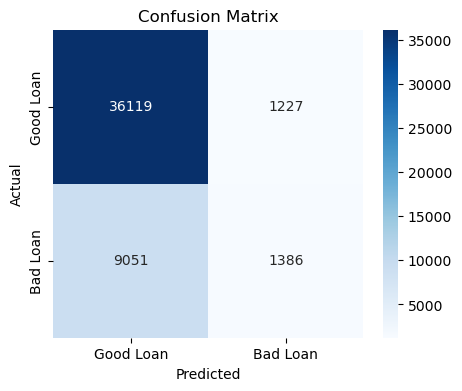

In [178]:
evaluate_model(y_true = y_test_if, 
               y_pred = y_pred, 
               y_probs = y_pred_proba[:,-1],
               threshold=0.5)

# Hyperparameter Tuning

## Train With Tuning

In [179]:
from sklearn.model_selection import GridSearchCV

In [181]:
# cost sensitive learning apporches for imbalanced data
scale_pos_weight = len(X_train_if[y_train_if == 0]) / len(X_train_if[y_train_if == 1])

# parameter tuning
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [5, 7],
    "model__learning_rate": [0.01, 0.1, 0.2],
    "model__colsample_bytree": [0.8, 1.0],
    "model__subsample": [0.8, 1.0],
    "model__scale_pos_weight": [0.8*scale_pos_weight, scale_pos_weight, 1.2*scale_pos_weight],  # Adjust to balance class ratio (79:21)
}

# Create GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb_pipe,
    param_grid=param_grid,
    scoring=scorings,
    refit='roc_auc',
    cv=SKF,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
xgb_grid.fit(X_train_if, y_train_if)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\LENOVO\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_po...
             param_grid={'model__colsample_bytree': [0.8, 1.0],
                         'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [5, 7],
                         'model__n_estimators': [100, 200],
                         'model__scale_pos_weight': [2.8624687283760046,
                                                     3.578085910470006,
                                                     4.293703092564007],
                         'model__subsample': [0.8, 1.0]},
             refit='roc_auc',
             scoring=['balanced_accuracy', 'precision', 'recall', 'f1',
                      'roc_auc', 'average_precision'],
             verbose=1)

## Save Model

In [182]:
import joblib

In [183]:
#save model
joblib.dump(xgb_grid, './xgboost_tuned_model.joblib') 
print('model is successfully saved')

model is successfully saved


In [184]:
xgb_grid = joblib.load('./xgboost_tuned_model.joblib') 
print('model is successfully loaded')

model is successfully loaded


## Assess The Model

## See How Far We Get

In [185]:
cv_result = pd.DataFrame(xgb_grid.cv_results_)
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__scale_pos_weight,param_model__subsample,params,split0_test_balanced_accuracy,split1_test_balanced_accuracy,split2_test_balanced_accuracy,split3_test_balanced_accuracy,split4_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_average_precision,split1_test_average_precision,split2_test_average_precision,split3_test_average_precision,split4_test_average_precision,mean_test_average_precision,std_test_average_precision,rank_test_average_precision
0,8.950458,0.633608,0.579004,0.118414,0.8,0.01,5,100,2.862469,0.8,"{'model__colsample_bytree': 0.8, 'model__learn...",0.631415,0.622126,0.630505,0.628264,0.629433,0.628348,0.003285,143,0.397770,0.390387,0.399175,0.395740,0.400767,0.396768,0.003593,3,0.455622,0.433400,0.450492,0.447505,0.444711,0.446346,0.007414,143,0.424735,0.410771,0.423284,0.420034,0.421597,0.420084,0.004917,143,0.705786,0.700207,0.706092,0.704042,0.703485,0.703922,0.002107,122,0.395358,0.387374,0.393704,0.394595,0.385460,0.391298,0.004065,127
1,6.205503,0.278904,0.707846,0.182320,0.8,0.01,5,100,2.862469,1.0,"{'model__colsample_bytree': 0.8, 'model__learn...",0.631239,0.621538,0.630675,0.627311,0.628256,0.627804,0.003457,144,0.397905,0.389662,0.399410,0.394880,0.400024,0.396376,0.003799,4,0.454824,0.432335,0.450759,0.445376,0.441650,0.444989,0.007764,144,0.424464,0.409891,0.423534,0.418610,0.419808,0.419261,0.005174,144,0.705140,0.699382,0.705717,0.703354,0.703126,0.703344,0.002218,128,0.394186,0.386836,0.393178,0.393379,0.384958,0.390507,0.003826,130
2,9.822693,0.654969,0.683187,0.259325,0.8,0.01,5,100,3.578086,0.8,"{'model__colsample_bytree': 0.8, 'model__learn...",0.651936,0.647687,0.651637,0.647445,0.647198,0.649181,0.002135,83,0.340370,0.337973,0.339450,0.337267,0.338543,0.338720,0.001092,97,0.662941,0.652695,0.664759,0.654158,0.648570,0.656624,0.006204,55,0.449801,0.445342,0.449413,0.445068,0.444870,0.446899,0.002220,88,0.705872,0.700148,0.706081,0.704075,0.703426,0.703920,0.002144,123,0.395394,0.387301,0.393667,0.394433,0.385342,0.391227,0.004090,128
3,7.054445,0.725976,0.638835,0.168526,0.8,0.01,5,100,3.578086,1.0,"{'model__colsample_bytree': 0.8, 'model__learn...",0.651403,0.646250,0.652728,0.646736,0.648043,0.649032,0.002580,85,0.339291,0.337038,0.340962,0.336203,0.338922,0.338483,0.001690,99,0.664405,0.649634,0.664227,0.654824,0.650965,0.656811,0.006361,53,0.449193,0.443818,0.450614,0.444294,0.445761,0.446736,0.002702,89,0.705095,0.699337,0.705898,0.703404,0.703139,0.703375,0.002267,126,0.394200,0.386651,0.393447,0.393502,0.384697,0.390499,0.003997,131
4,9.665557,0.689745,0.647563,0.121580,0.8,0.01,5,100,4.293703,0.8,"{'model__colsample_bytree': 0.8, 'model__learn...",0.637020,0.633070,0.632840,0.633329,0.638585,0.634969,0.002371,131,0.297045,0.295845,0.294791,0.294844,0.299167,0.296338,0.001635,142,0.809315,0.794943,0.801437,0.804258,0.802794,0.802550,0.004644,1,0.434584,0.431211,0.431036,0.431499,0.435895,0.432845,0.002004,131,0.705838,0.700062,0.706182,0.703998,0.703587,0.703933,0.002181,121,0.395306,0.387252,0.393506,0.394144,0.385402,0.391122,0.004000,129


In [186]:
display_cols = ['params',
                'mean_fit_time',
                 'mean_test_balanced_accuracy',
                 'mean_test_precision', 
                 'mean_test_recall',
                 'mean_test_f1',
                 'mean_test_roc_auc',
                 'mean_test_average_precision']

cv_result[display_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,144.0,17.490254,14.999809,5.111323,8.853460,11.908549,19.823321,91.647179
mean_test_balanced_accuracy,144.0,0.648829,0.007532,0.627804,0.644133,0.650697,0.654814,0.659049
mean_test_precision,144.0,0.353270,0.026985,0.295833,0.334426,0.351991,0.381943,0.401416
mean_test_recall,144.0,0.626718,0.091082,0.444989,0.549729,0.643996,0.689832,0.802550
mean_test_f1,144.0,0.446745,0.008598,0.419261,0.442209,0.449348,0.452673,0.458094
mean_test_roc_auc,144.0,0.710115,0.005445,0.697320,0.706151,0.711247,0.715098,0.718300
mean_test_average_precision,144.0,0.400605,0.007120,0.386506,0.394527,0.401821,0.406863,0.411372


Not very much difference in ROC-AUC scores but for recall it shows a differences

In [187]:
cv_result[cv_result.rank_test_roc_auc == 1][display_cols].T

,30
params,"{'model__colsample_bytree': 0.8, 'model__learn..."
mean_fit_time,15.173183
mean_test_balanced_accuracy,0.653042
mean_test_precision,0.384921
mean_test_recall,0.553095
mean_test_f1,0.453917
mean_test_roc_auc,0.7183
mean_test_average_precision,0.411372


The recall we get is low. but it can be improved by adjusting decision treshold

In [191]:
y_pred_tuned = xgb_grid.predict(X_test_if)
y_pred_proba_tuned = xgb_grid.predict_proba(X_test_if)[:,1]

Evaluation Metrics:
Accuracy: 0.7082
Precision: 0.3836
Recall (Sensitivity): 0.5536
F1 Score: 0.4532
ROC-AUC: 0.7190
PR-AUC: 0.4145


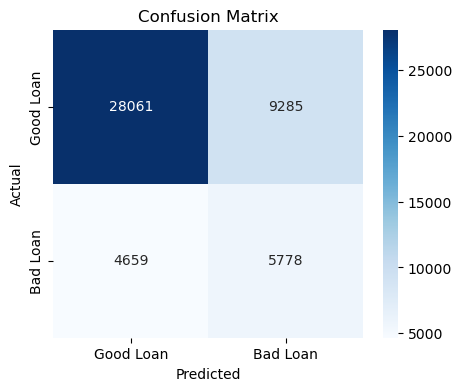

In [192]:
evaluate_model(y_true = y_test_if, 
               y_pred = y_pred_tuned, 
               y_probs = y_pred_proba_tuned,
               threshold=0.5)

# Feature Selection

In [193]:
from sklearn.feature_selection import RFECV

In [194]:
rfecv = RFECV(
    estimator=xgb_grid.estimator['model'],
    step=1,
    cv=SKF,
    scoring="roc_auc",
    min_features_to_select=15,
    n_jobs=-1,
)
rfecv.fit(X_train_if, y_train_if)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
      estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              i...straints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=0, ...),
      min_features_to_select=15, n_jobs=-1, scoring='roc_auc')

In [195]:
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 24


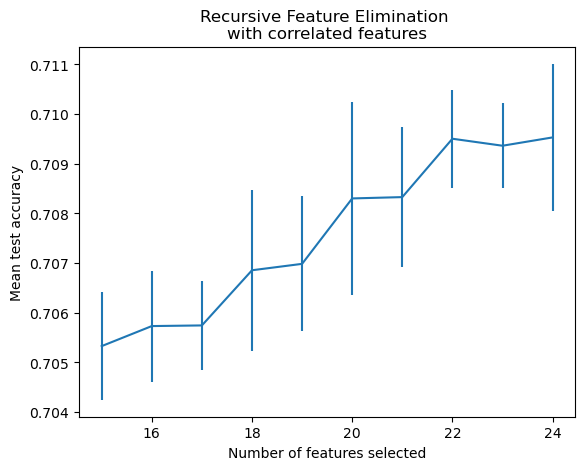

In [196]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [197]:
feature_importances = rfecv.feature_names_in_[rfecv.ranking_ == 1]
feature_importances

array(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'mths_earliest_cr_line',
       'emp_length', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'], dtype=object)

In [198]:
len(feature_importances)

24

In [199]:
best_params = xgb_grid.best_params_
best_params_new = dict()
for k in best_params.keys():
    best_params_new[k[7:]] = best_params[k]

In [200]:
best_params_new

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'scale_pos_weight': 2.8624687283760046,
 'subsample': 0.8}

In [201]:
# XGBoost pipeline
xgb_model = XGBClassifier(**best_params_new,random_state=0)
xgb_pipe = Pipeline([
    ('model', xgb_model)
])

In [202]:
feature_importances = [
    'loan_amnt', 
    'term', 
    'int_rate', 
    'annual_inc', 
    'dti',
    'delinq_2yrs', 
    'inq_last_6mths', 
    'open_acc', 
    'pub_rec',
    'revol_bal', 
    'revol_util', 
    'total_acc', 
    'tot_coll_amt',
    'tot_cur_bal', 
    'total_rev_hi_lim', 
    'mths_earliest_cr_line',
    'emp_length', 
    'home_ownership', 
    'verification_status', 
    'purpose',
    'addr_state', 
    'initial_list_status',
    'acc_now_delinq',
    'collections_12_mths_ex_med'
]

# Adjusting Threshold

In [203]:
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, confusion_matrix

In [205]:
X_train = X_train_if[xgb_grid.feature_names_in_].copy()
X_test = X_test_if[xgb_grid.feature_names_in_].copy()
X_cal = X_cal_if[xgb_grid.feature_names_in_].copy()

y_train = y_train_if.copy()
y_test = y_test_if.copy()
y_cal = y_cal_if.copy()

In [206]:
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [207]:
y_pred_tuned = xgb_pipe.predict(X_test)
y_pred_proba_tuned = xgb_pipe.predict_proba(X_test)[:,1]

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


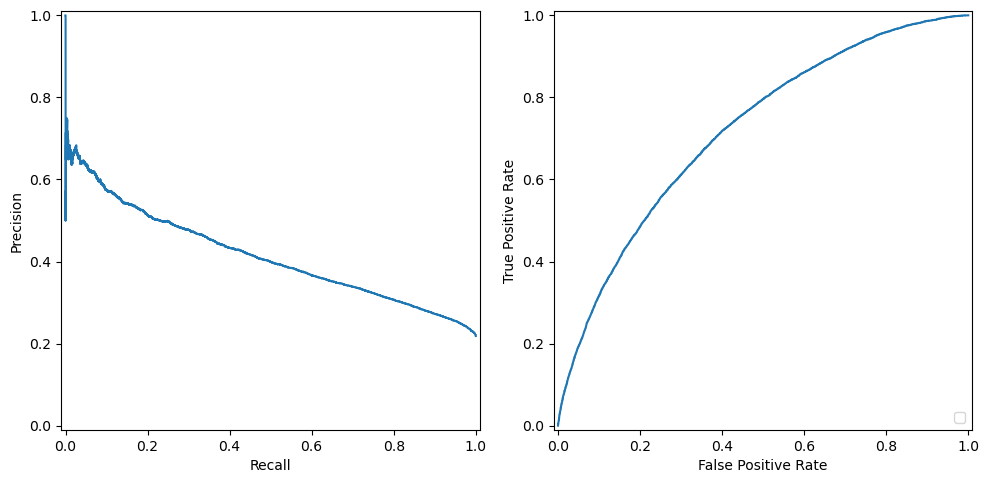

In [208]:
precision, recall, _ = precision_recall_curve(y_test_if, y_pred_proba_tuned)
dispPR = PrecisionRecallDisplay(precision=precision, recall=recall)

fpr, tpr, thresholds = roc_curve(y_test_if, y_pred_proba_tuned)
dispROC = RocCurveDisplay(fpr=fpr, tpr=tpr)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 15))

dispPR.plot(ax=ax1)
dispROC.plot(ax=ax2)

plt.tight_layout()

In [209]:
def y_pred_given_threshold(y_pred_proba, threshold):
    y_pred = (y_pred_proba >= threshold).astype(int)
    return y_pred

def loan_score_func(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return 2000*tn - 7550*fn

def calc_score(y_true, y_pred_proba, 
               treshold_min = 0, trehsold_max = 1, num=20):
    treshold_range = np.linspace(treshold_min, trehsold_max, num)
    score_range = []
    for i in treshold_range:
        y_pred_i = y_pred_given_threshold(y_pred_proba, i)
        score_i =  loan_score_func(y_true, y_pred_i)
        score_range.append(score_i)

    return treshold_range, score_range

Optimal Threshold: 0.42, Max Score: 22,475,150.00
Score at Threshold 0.5: 19,619,550.00
Score at Not Use Model: -4,107,350.00


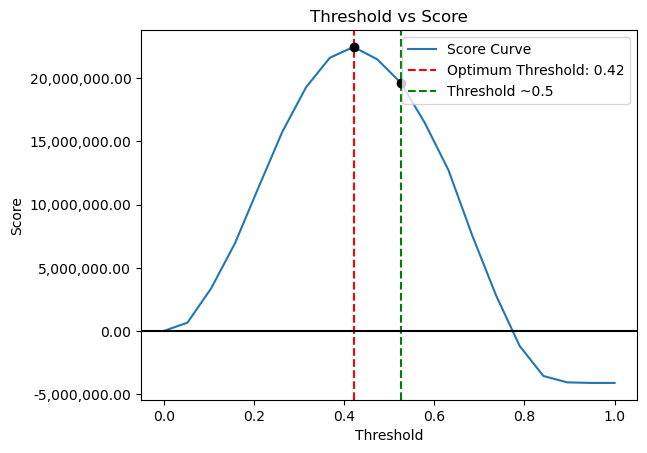

In [210]:
treshold_range, score_range = calc_score(y_test, y_pred_proba_tuned)

# Find the max threshold and score
max_index = np.argmax(score_range)
opt_treshold = treshold_range[max_index]
max_score = score_range[max_index]

# Find the score when the threshold is closest to 0.5
default_treshold_index = np.argmin(np.abs(treshold_range - 0.5))
defalt_treshold = treshold_range[default_treshold_index]
default_treshold_score = score_range[default_treshold_index]

# Display the results
print(f"Optimal Threshold: {opt_treshold:.2f}, Max Score: {max_score:,.2f}")
print(f"Score at Threshold 0.5: {default_treshold_score:,.2f}")
print(f"Score at Not Use Model: {score_range[-1]:,.2f}")

# Plot the graph
plt.plot(treshold_range, score_range, label="Score Curve")
plt.axvline(opt_treshold, color='r', linestyle='--', label=f"Optimum Threshold: {opt_treshold:.2f}")
plt.axvline(defalt_treshold, color='g', linestyle='--', label = "Threshold ~0.5")
plt.axhline(0, color='k', linestyle='-')
plt.scatter([opt_treshold, defalt_treshold], [max_score, default_treshold_score], color='black', zorder=5)


# Format the y-axis
formatter = FuncFormatter(lambda x, _: f"{x:,.2f}")
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Threshold vs Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()

Evaluation Metrics:
Accuracy: 0.7082
Precision: 0.3836
Recall (Sensitivity): 0.5536
F1 Score: 0.4532
ROC-AUC: 0.7190
PR-AUC: 0.4145


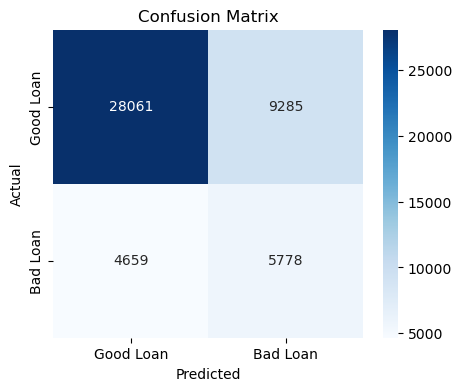

In [211]:
evaluate_model(y_true = y_test, 
               y_pred = y_pred_tuned, 
               y_probs = y_pred_proba_tuned,
               threshold=opt_treshold)

# Save Final Model

In [212]:
final_model_path = './final_model.joblib'

In [213]:
joblib.dump(xgb_pipe, final_model_path) 
print('final model is successfully saved')

final model is successfully saved


In [214]:
final_model = joblib.load(final_model_path)

# Insight and Interpretations

## Interpretation from XGBoost

In [78]:
import shap
shap.initjs()

In [79]:
X = X_test.sample(1000, random_state=0)
y = y_test[X.index]

In [80]:
explainer = shap.TreeExplainer(final_model['model'])
shap_values = explainer(X)

### Summary Plot

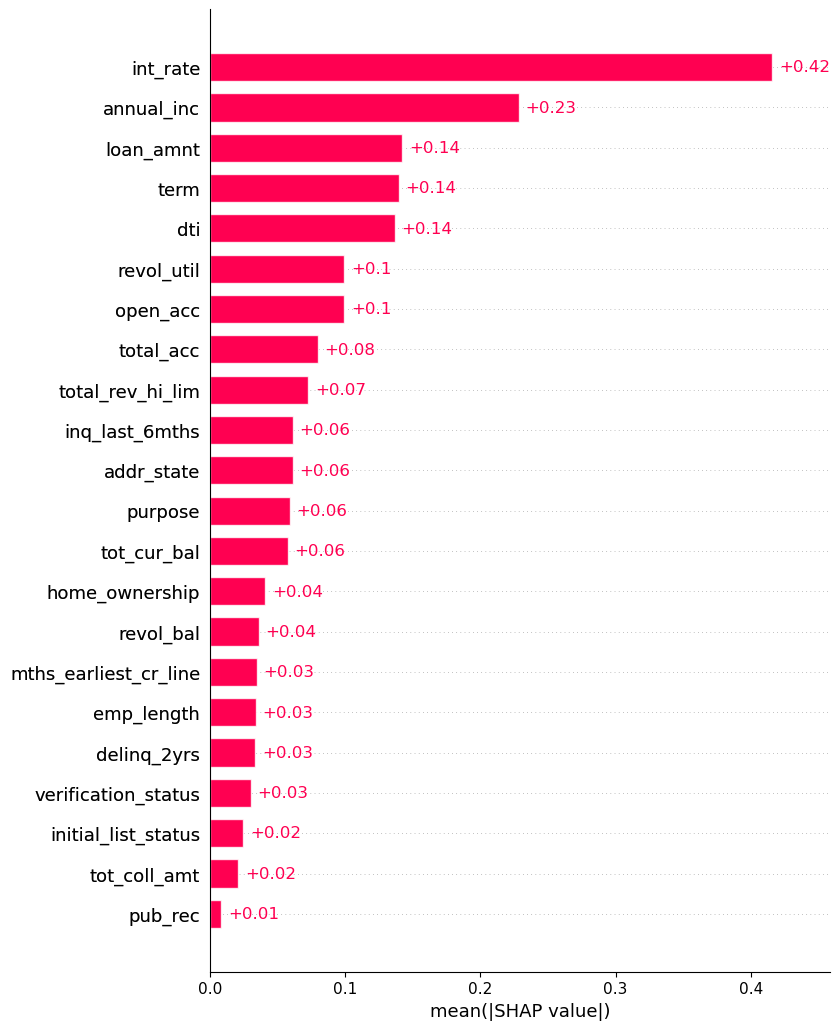

In [69]:
shap.plots.bar(shap_values, max_display=30)

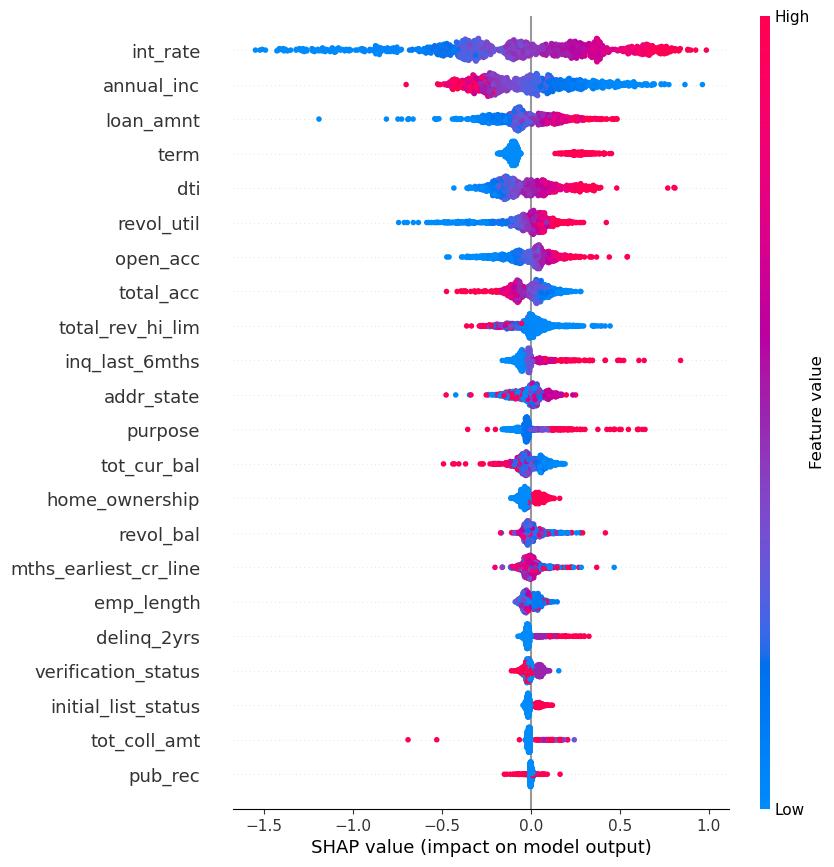

In [70]:
shap.plots.beeswarm(shap_values, max_display=30)

### Dependence Plot

In [71]:
for i, col_name in enumerate(X_test.columns):
    print((i, col_name))

(0, 'loan_amnt')
(1, 'term')
(2, 'int_rate')
(3, 'annual_inc')
(4, 'dti')
(5, 'delinq_2yrs')
(6, 'inq_last_6mths')
(7, 'open_acc')
(8, 'pub_rec')
(9, 'revol_bal')
(10, 'revol_util')
(11, 'total_acc')
(12, 'tot_coll_amt')
(13, 'tot_cur_bal')
(14, 'total_rev_hi_lim')
(15, 'mths_earliest_cr_line')
(16, 'emp_length')
(17, 'home_ownership')
(18, 'verification_status')
(19, 'purpose')
(20, 'addr_state')
(21, 'initial_list_status')


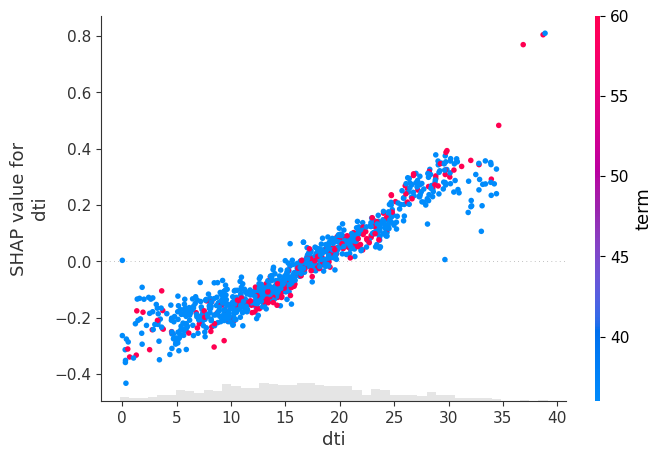

In [72]:
shap.plots.scatter(shap_values[:, "dti"], color=shap_values[:,1])

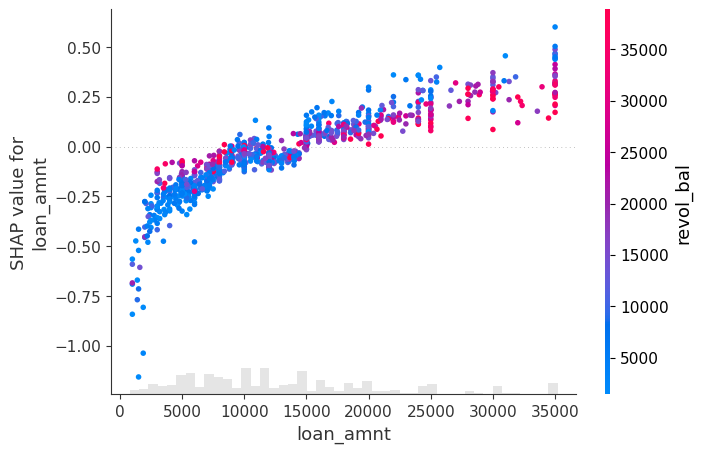

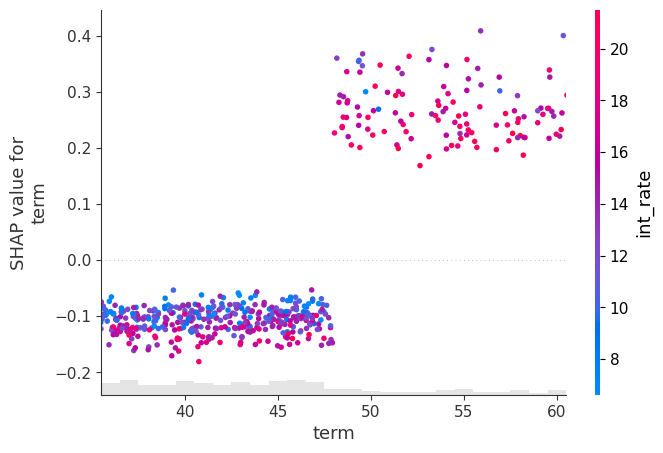

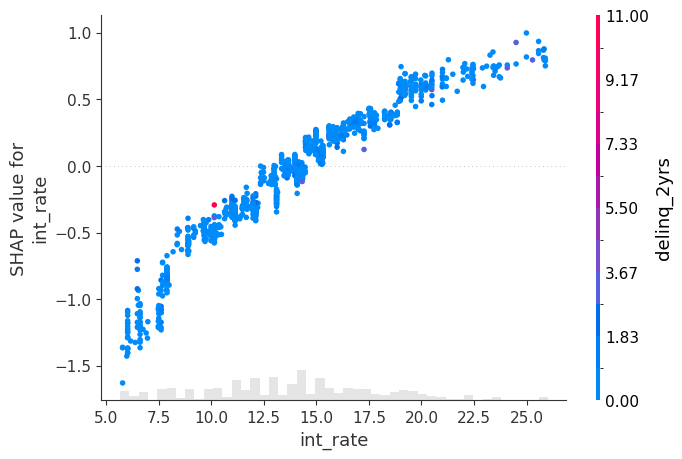

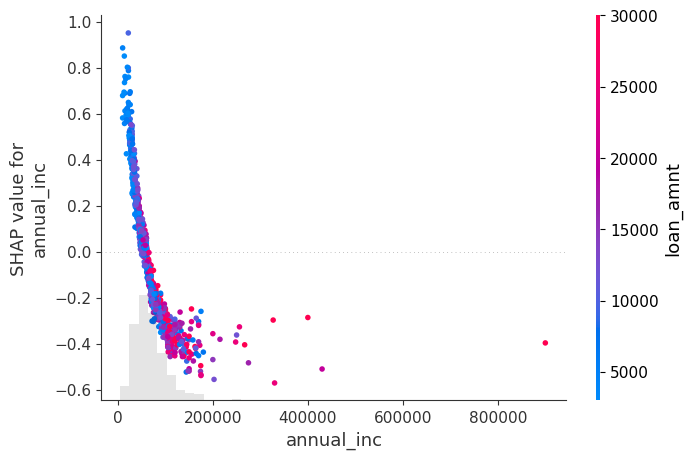

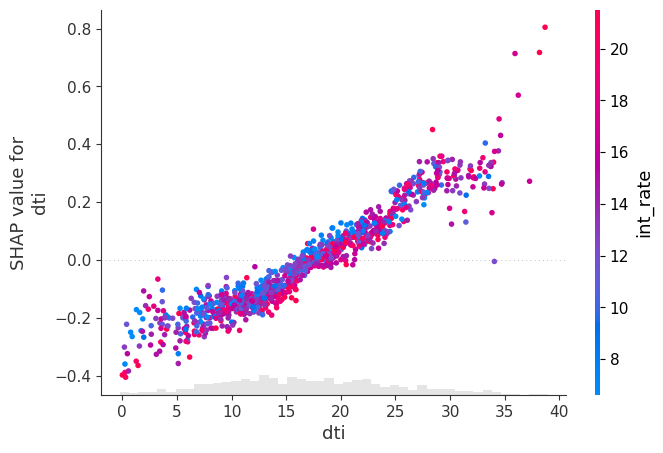

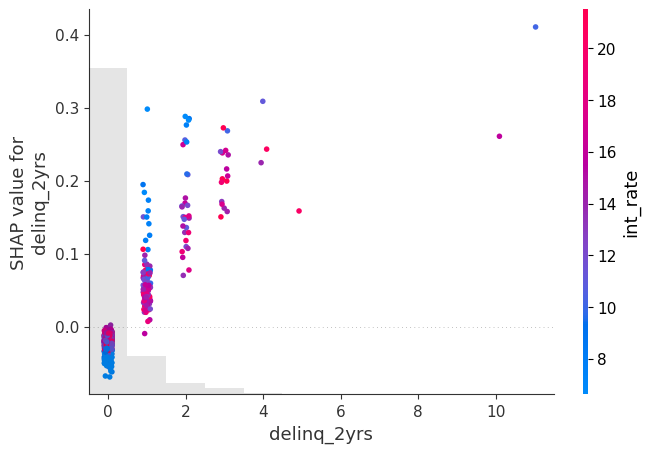

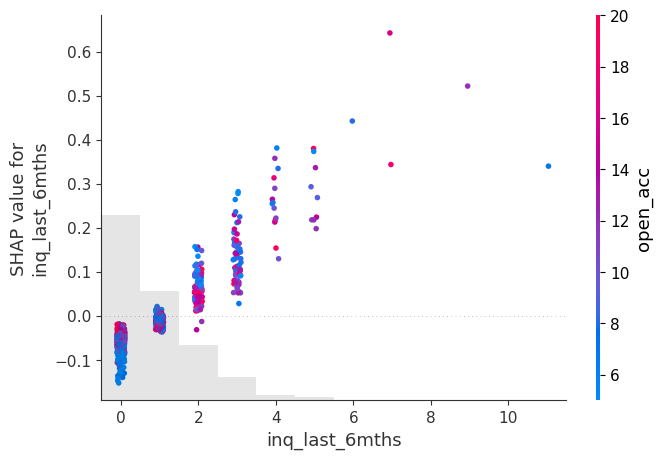

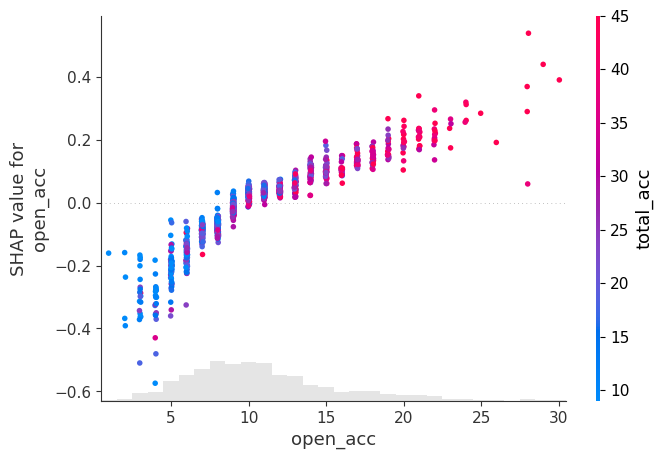

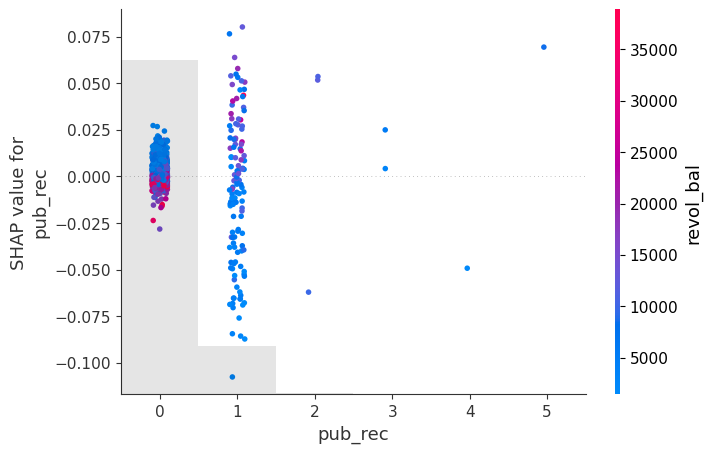

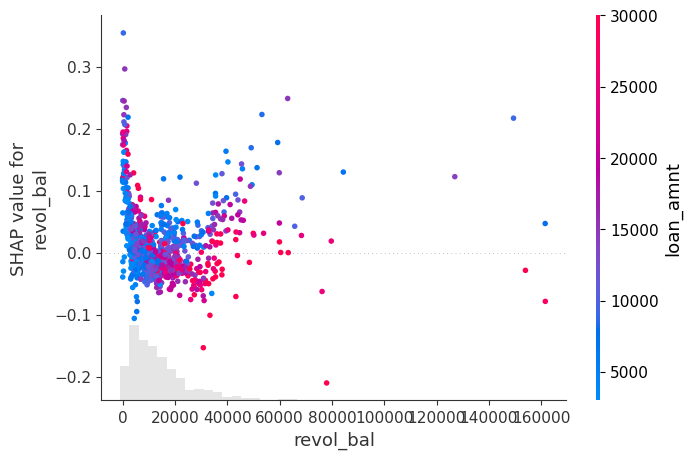

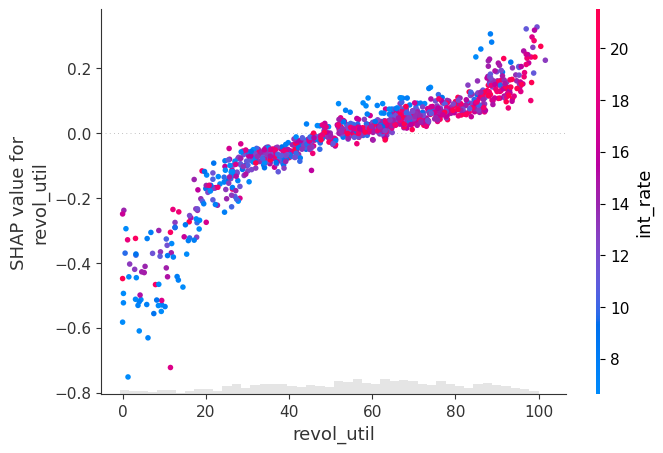

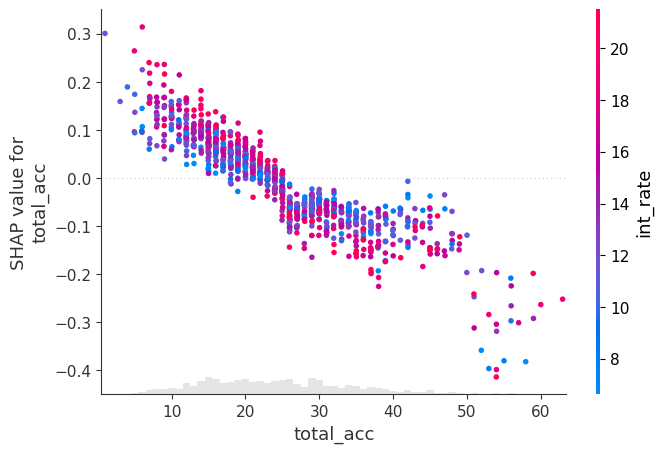

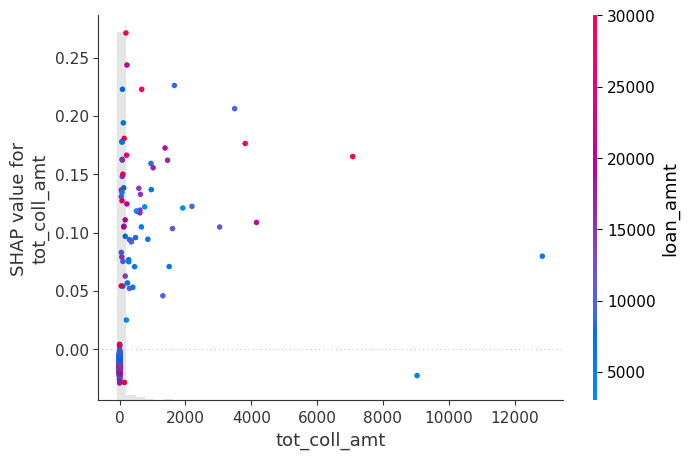

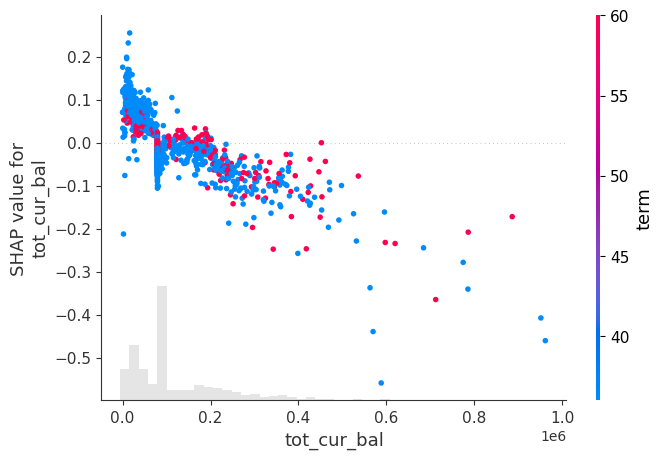

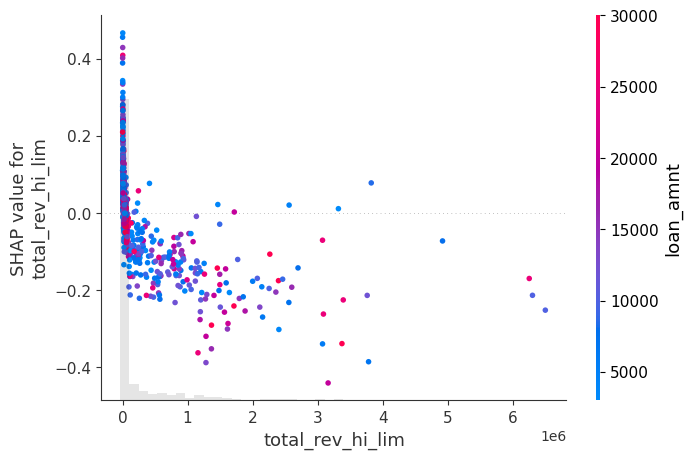

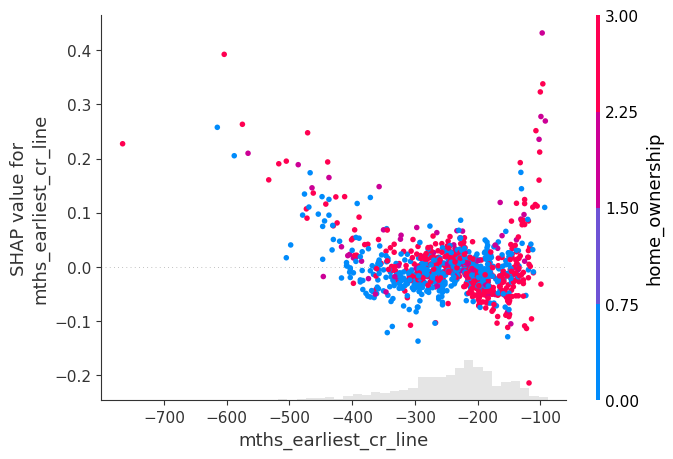

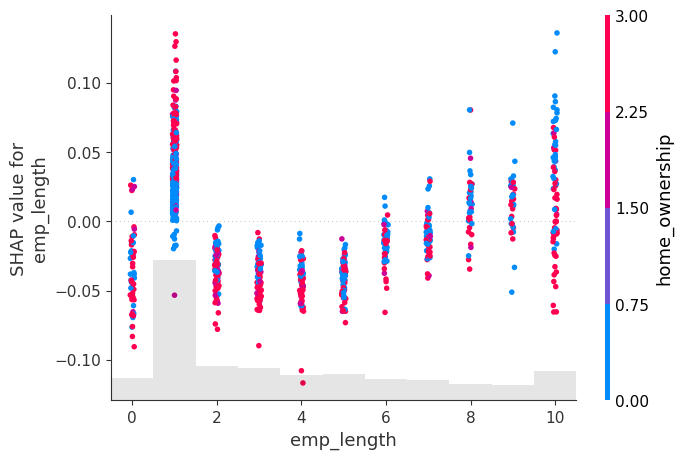

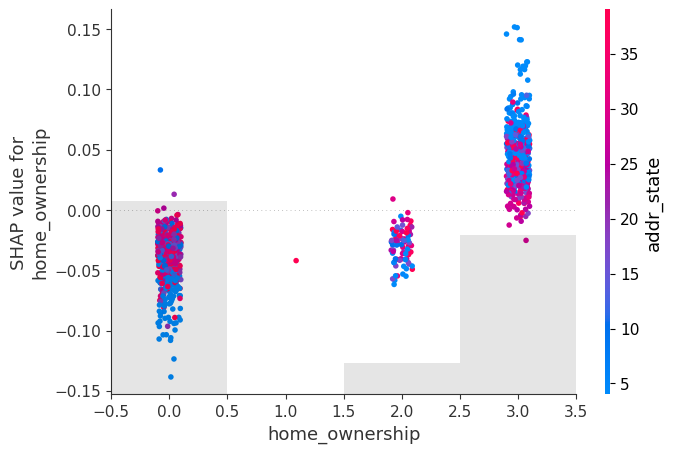

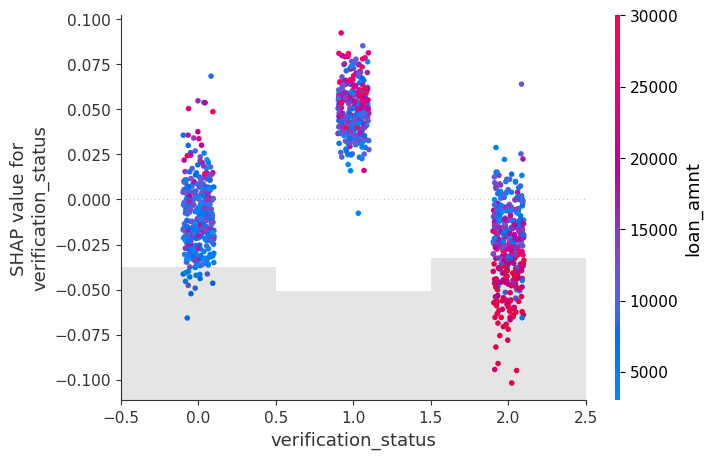

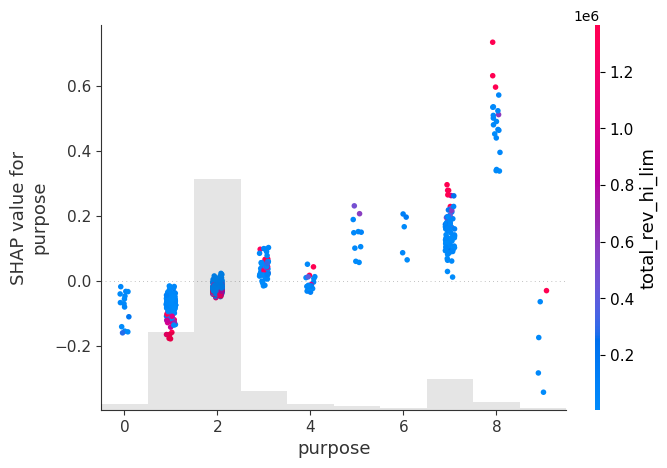

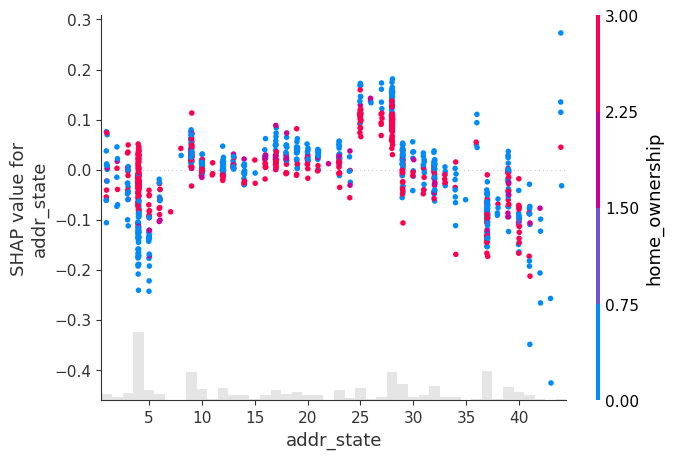

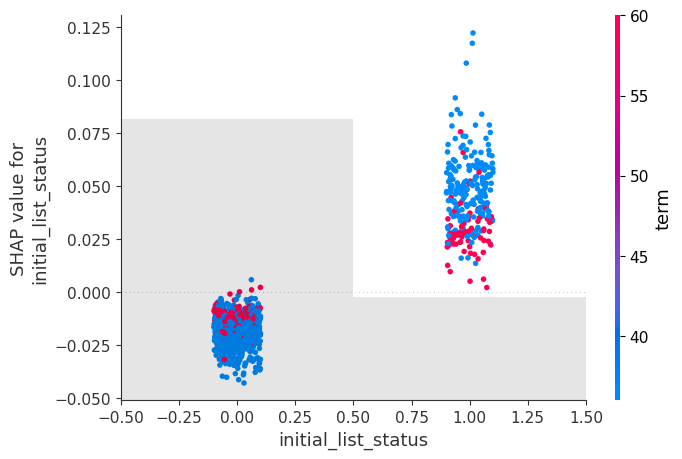

In [236]:
for name in X_test.columns:
    shap.plots.scatter(shap_values[:, name], color=shap_values)

# Calculating Business Impact

## Create Data For Evaluations

In [215]:
data = pd.read_csv('./dataset/final_loan_data.csv', low_memory = False)
data.drop(columns='Unnamed: 0', inplace=True)
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,target
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [216]:
col_focus = ['loan_amnt','funded_amnt','total_pymnt', 'loan_status','target']

data_focus = data.loc[X_cal_if.index, col_focus].copy()
data_focus['profit'] = data_focus['total_pymnt'] - data_focus['funded_amnt']
data_focus['percent_profit'] = 100*data_focus['profit'] / data_focus['funded_amnt']

In [219]:
X = X_cal_if.loc[:, xgb_pipe.feature_names_in_]
y = y_cal_if

In [220]:
y_pred = final_model.predict_proba(X)
y_pred_adj = (y_pred[:,1] >= opt_treshold).astype(int)
y_pred_adj = pd.Series(data = y_pred_adj, name='y_pred', index=y.index)

In [221]:
data_eval = pd.concat([data_focus, y_pred_adj], axis=1)
data_eval.head()

,loan_amnt,funded_amnt,total_pymnt,loan_status,target,profit,percent_profit,y_pred
103226,24000,24000,25203.400000,Fully Paid,0,1203.400000,5.014167,1
105859,6100,6100,2698.840000,Charged Off,1,-3401.160000,-55.756721,1
197053,6300,6300,6491.442936,Fully Paid,0,191.442936,3.038777,0
50834,14000,14000,16130.368850,Fully Paid,0,2130.368850,15.216920,0
171203,8000,8000,8823.880000,Fully Paid,0,823.880000,10.298500,0


## Credit Risk Statistic Matrices

### Non Performing Loans

In [240]:
accepted_loan = data_eval[(data_eval.y_pred == 0)]

In [241]:
bad_loan_leak = len(accepted_loan[accepted_loan.target == 1])
total_loan_accepted = len(accepted_loan)
NPL_ratio = 100*bad_loan_leak/total_loan_accepted

print(f"NPL Ratio: {NPL_ratio:.2f}")

NPL Ratio: 12.35


### Charge Off Rate

In [224]:
cond1 = accepted_loan.loan_status == 'Charged Off'
cond2 = accepted_loan.loan_status == 'Does not meet the credit policy. Status:Charged Off'
charge_off_num = len(accepted_loan[cond1 | cond2])
charge_off_rate = 100*charge_off_num/total_loan_accepted
print(f"Charged Ratio: {charge_off_rate :.2f}")

Charged Ratio: 10.52


### Delinquency Rate

In [225]:
cond1 = accepted_loan.loan_status == 'Late (31-120 days)'
cond2 = accepted_loan.loan_status == 'Late (16-30 days)'
delinq_num = len(accepted_loan[cond1 | cond2])
delinq_rate = 100*delinq_num/total_loan_accepted
print(f"Delinquency Rate: {delinq_rate :.2f}")

Delinquency Rate: 1.71


### Default Rate

In [226]:
cond = accepted_loan.loan_status == 'Default'
default_rate_num = len(accepted_loan[cond])
default_rate = 100*default_rate_num/total_loan_accepted
print(f"Delinquency Rate: {default_rate :.2f}")

Delinquency Rate: 0.11


## Financial Impacts Matrics

### Evaluate Total Profit Earned

In [227]:
profit_before = data_eval.profit.sum()
proftt_using_model = data_eval[data_eval['y_pred']==0]['profit'].sum()

print(f"Profit Earned if not using model: $ {profit_before :,.2f}")
print(f"Profit Earned if using model: $ {proftt_using_model :,.2f}")

Profit Earned if not using model: $ -906,191.08
Profit Earned if using model: $ 6,434,789.34


### Evaluate Expected Loss

In [235]:
cond = data_eval.loan_status == 'Default'
default_rate_without_model = 100*len(data_eval[cond])/len(data_eval)
default_rate_with_model = default_rate

In [237]:
loss_given_default = np.abs(data_eval[data_eval.loan_status == 'Default']['percent_profit'].median()/100)
loss_given_default_model = np.abs(accepted_loan[accepted_loan.loan_status == 'Default']['percent_profit'].median()/100)

loss_given_default, loss_given_default_model

(0.5499250555555556, 0.46547499999999997)

In [238]:
exposure_at_default = data_eval[data_eval.loan_status == 'Default']['funded_amnt'].median()
exposure_at_default_model = accepted_loan[accepted_loan.loan_status == 'Default']['funded_amnt'].median()

exposure_at_default, exposure_at_default_model

(12625.0, 9000.0)

In [239]:
expected_loss_without_model = default_rate_without_model * loss_given_default * exposure_at_default
expected_loss_using_model = default_rate_with_model * loss_given_default_model * exposure_at_default_model


print(f"Expected Loss without model: $ -{expected_loss_without_model :,.2f}")
print(f"Expected Loss using model: $ -{expected_loss_using_model :,.2f}")

Expected Loss without model: $ -2,179.50
Expected Loss using model: $ -478.77
